In [7]:
from functions import *
from xPRA import xPRA

parameters = {}
parameters['time'] = time.monotonic()
parameters['flag'] = False

parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
parameters['sample_rate'] = 10e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 100  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 30  # dB
parameters['wavelength'] = 3e8/parameters['center_freq']

# imaging parameters
parameters['doi_size'] = 3  # m
parameters['detection_size'] = 0.1  # m

parameters['alpha'] = 100  # 1e2
parameters['denoising_weight'] = 0.05
parameters['pixel_size'] = (60, ) * 2  # NxN square matrix

parameters['k0'] = 2*np.pi/parameters['wavelength']
parameters['cellrad'] = parameters['doi_size']/(parameters['pixel_size'][0]*np.sqrt(np.pi))

parameters['device_coordinates'] = get_device_coordinates(parameters)
parameters['grid_coordinates'] = get_grid_coordinates(parameters)

In [8]:
Pinc = np.load('Pinc.npy')
Ptot = np.load('Ptot.npy')


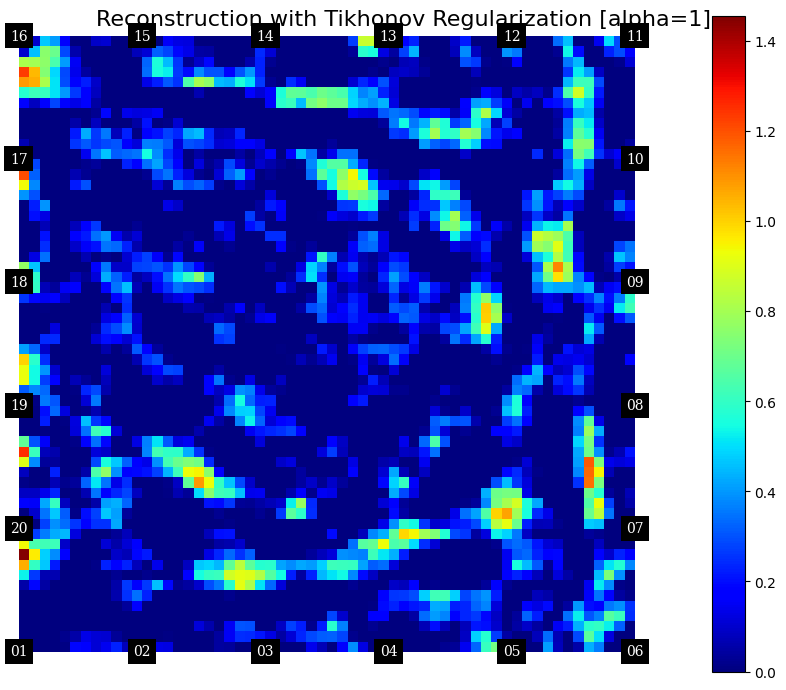

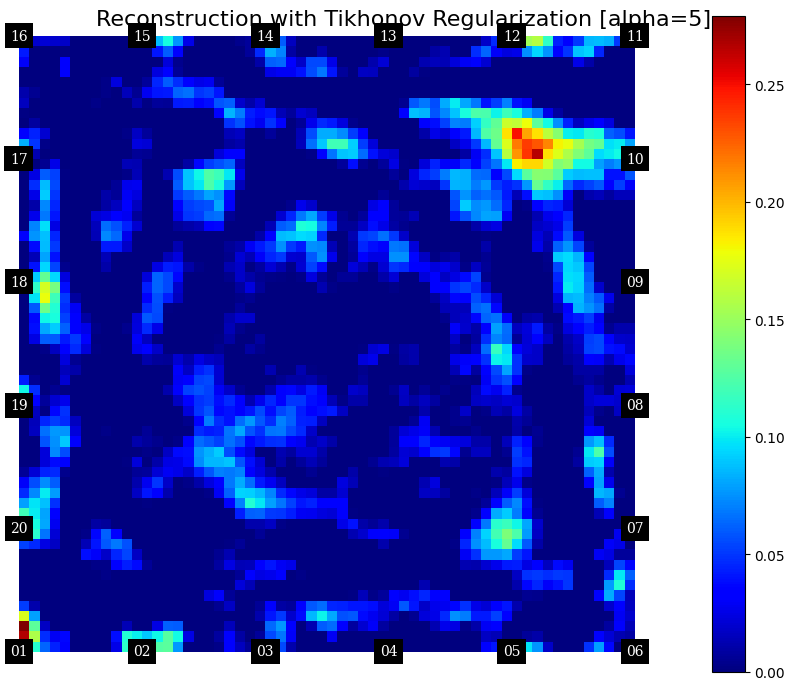

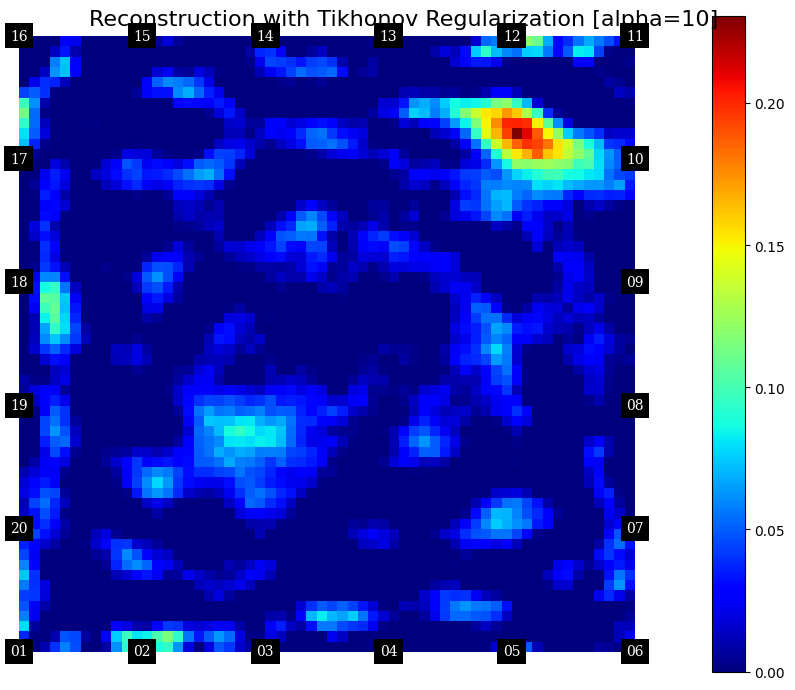

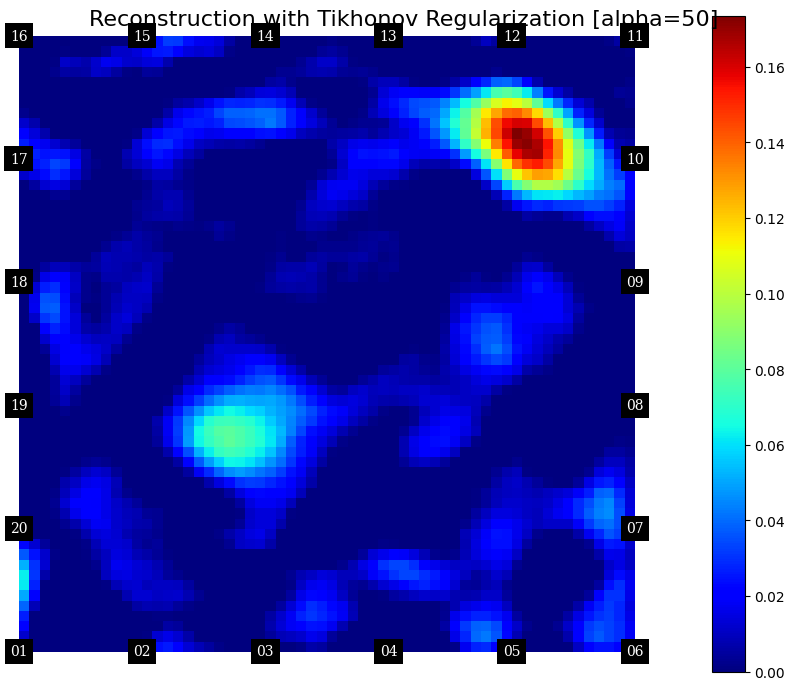

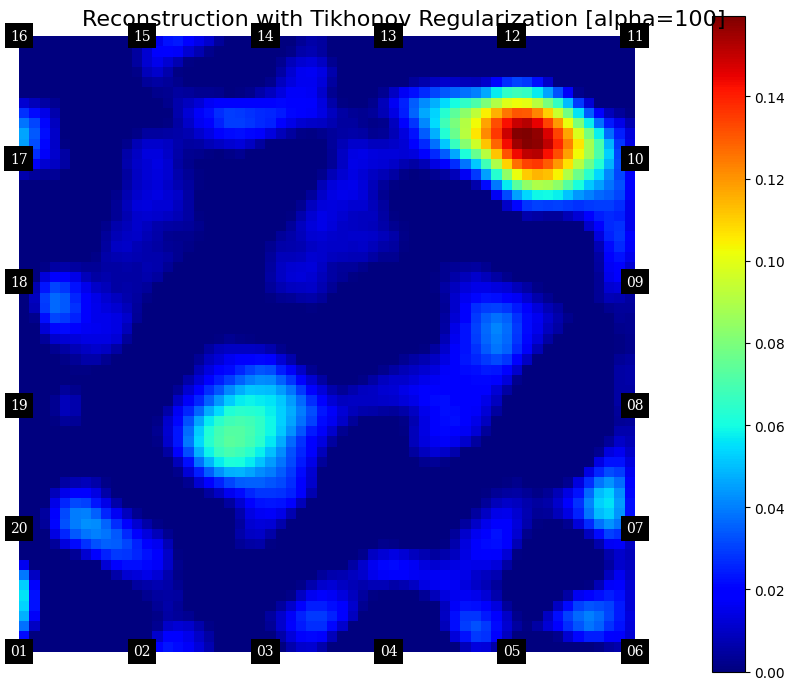

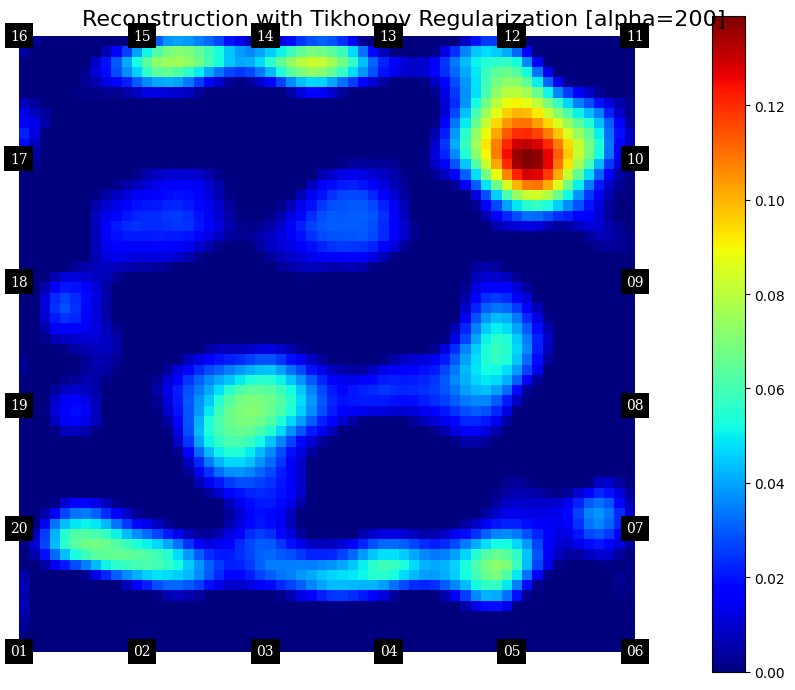

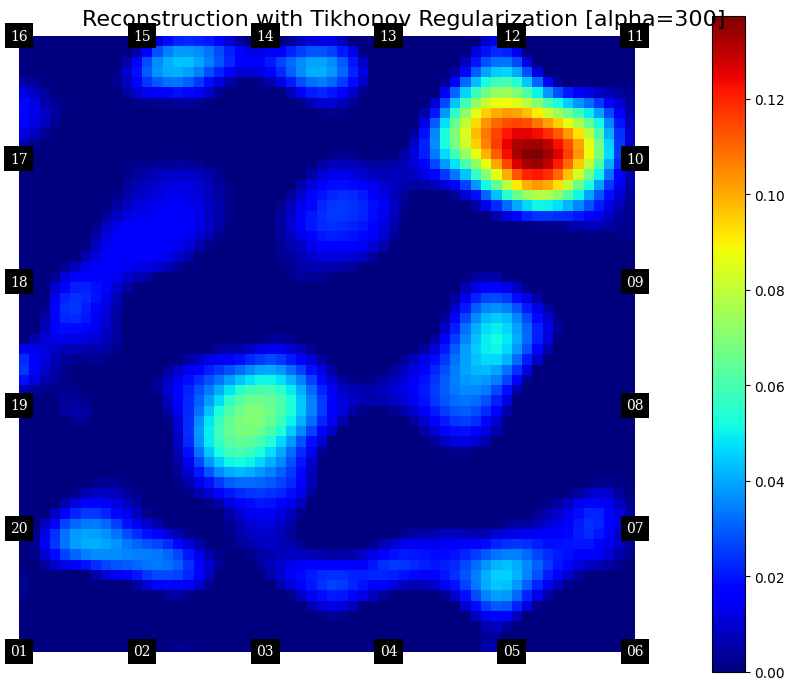

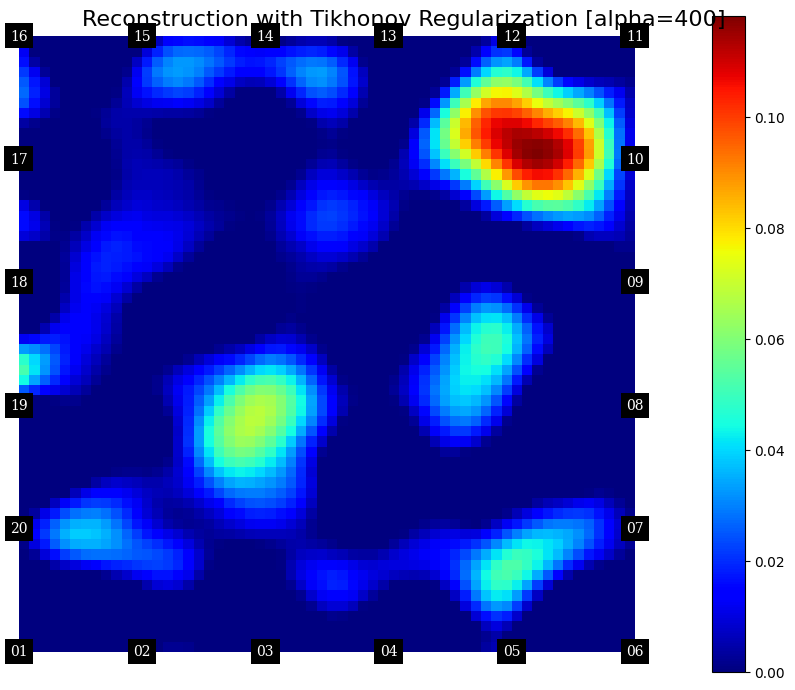

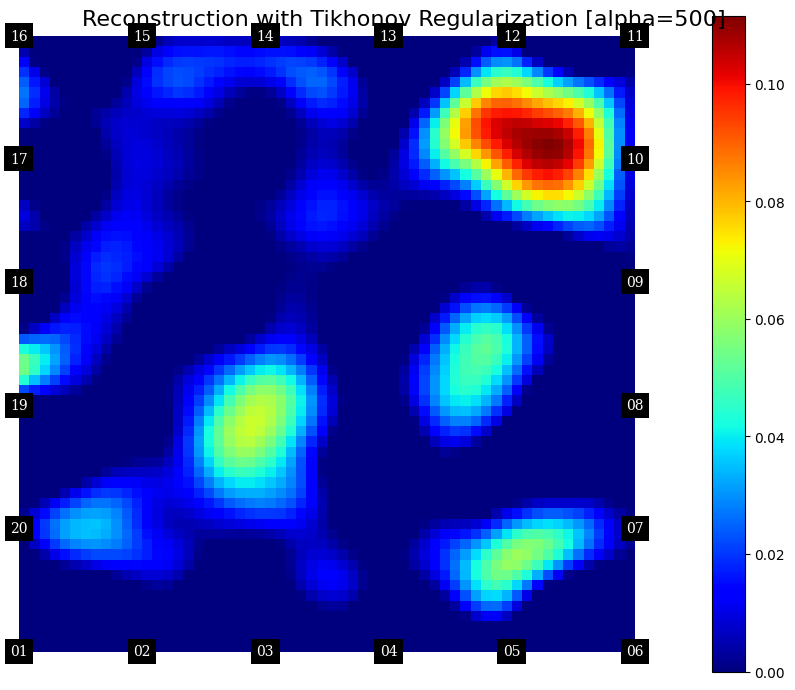

In [9]:
for i in [1, 5, 10, 50, 100, 200, 300, 400, 500]:
    parameters['alpha'] = i
    parameters['flag'] = False

    result = xPRA(parameters, Pinc, Ptot)
    result_visualization(parameters, result, f"Reconstruction with Tikhonov Regularization [alpha={parameters['alpha']}]")
